<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(2_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,77.967847,62.802464,-11.824493,138.945818,139.550680,-0.604862
1,0.0,1.0,97.452835,35.866320,-64.048909,79.270246,143.770040,-64.499794
2,0.0,2.0,25.856185,47.408966,-195.922920,-112.657768,32.241750,-144.899518
3,0.0,3.0,54.510062,23.932271,58.535588,146.977921,56.166597,90.811324
4,0.0,4.0,31.165312,31.920068,-92.456717,-19.371338,24.441067,-43.812404
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,30.885337,58.560318,111.794107,211.239762,87.810058,123.429703
19996,999.0,16.0,67.936353,50.932239,-23.408858,105.459734,197.742535,-92.282800
19997,999.0,17.0,39.371195,86.561600,-222.854770,-86.921975,156.453946,-243.375921
19998,999.0,18.0,39.897865,41.697399,-131.533052,-39.937788,92.623132,-132.560920


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    77.967847  62.802464  -11.824493  138.945818  139.550680   
      1.0    97.452835  35.866320  -64.048909   79.270246  143.770040   
      2.0    25.856185  47.408966 -195.922920 -112.657768   32.241750   
      3.0    54.510062  23.932271   58.535588  146.977921   56.166597   
      4.0    31.165312  31.920068  -92.456717  -19.371338   24.441067   
...                ...        ...         ...         ...         ...   
999.0 15.0   30.885337  58.560318  111.794107  211.239762   87.810058   
      16.0   67.936353  50.932239  -23.408858  105.459734  197.742535   
      17.0   39.371195  86.561600 -222.854770  -86.921975  156.453946   
      18.0   39.897865  41.697399 -131.533052  -39.937788   92.623132   
      19.0   32.902557  98.925020 -149.121151   -7.293574  153.379680   

                  e_hat  
rep   index              
0.0   0.0     -0.604862  
      1.0    -64.499794  
      2.0   -144.899518  
      3.0     90.811324  
      4.0    -43.812404  
...                 ...  
999.0 15.0   123.429703  
      16.0   -92.282800  
      17.0  -243.375921  
      18.0  -132.560920  
      19.0  -160.673254  

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    77.967847  62.802464  -11.824493  138.945818  139.550680   
      1.0    97.452835  35.866320  -64.048909   79.270246  143.770040   
      2.0    25.856185  47.408966 -195.922920 -112.657768   32.241750   
      3.0    54.510062  23.932271   58.535588  146.977921   56.166597   
      4.0    31.165312  31.920068  -92.456717  -19.371338   24.441067   
...                ...        ...         ...         ...         ...   
999.0 15.0   30.885337  58.560318  111.794107  211.239762   87.810058   
      16.0   67.936353  50.932239  -23.408858  105.459734  197.742535   
      17.0   39.371195  86.561600 -222.854770  -86.921975  156.453946   
      18.0   39.897865  41.697399 -131.533052  -39.937788   92.623132   
      19.0   32.902557  98.925020 -149.121151   -7.293574  153.379680   

                  e_hat  
rep   index              
0.0   0.0     -0.604862  
      1.0    -64.499794  
      2.0   -144.899518  
      3.0     90.811324  
      4.0    -43.812404  
...                 ...  
999.0 15.0   123.429703  
      16.0   -92.282800  
      17.0  -243.375921  
      18.0  -132.560920  
      19.0  -160.673254  

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,77.967847,62.802464,-11.824493,138.945818,139.550680,-0.604862
1,0.0,1.0,97.452835,35.866320,-64.048909,79.270246,143.770040,-64.499794
2,0.0,2.0,25.856185,47.408966,-195.922920,-112.657768,32.241750,-144.899518
3,0.0,3.0,54.510062,23.932271,58.535588,146.977921,56.166597,90.811324
4,0.0,4.0,31.165312,31.920068,-92.456717,-19.371338,24.441067,-43.812404
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,30.885337,58.560318,111.794107,211.239762,87.810058,123.429703
19996,999.0,16.0,67.936353,50.932239,-23.408858,105.459734,197.742535,-92.282800
19997,999.0,17.0,39.371195,86.561600,-222.854770,-86.921975,156.453946,-243.375921
19998,999.0,18.0,39.897865,41.697399,-131.533052,-39.937788,92.623132,-132.560920


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    77.967847  62.802464  -11.824493  138.945818  139.550680   
      1.0    97.452835  35.866320  -64.048909   79.270246  143.770040   
      2.0    25.856185  47.408966 -195.922920 -112.657768   32.241750   
      3.0    54.510062  23.932271   58.535588  146.977921   56.166597   
      4.0    31.165312  31.920068  -92.456717  -19.371338   24.441067   
...                ...        ...         ...         ...         ...   
999.0 15.0   30.885337  58.560318  111.794107  211.239762   87.810058   
      16.0   67.936353  50.932239  -23.408858  105.459734  197.742535   
      17.0   39.371195  86.561600 -222.854770  -86.921975  156.453946   
      18.0   39.897865  41.697399 -131.533052  -39.937788   92.623132   
      19.0   32.902557  98.925020 -149.121151   -7.293574  153.379680   

                  e_hat  
rep   index              
0.0   0.0     -0.604862  
      1.0    -64.499794  
      2.0   -144.899518  
      3.0     90.811324  
      4.0    -43.812404  
...                 ...  
999.0 15.0   123.429703  
      16.0   -92.282800  
      17.0  -243.375921  
      18.0  -132.560920  
      19.0  -160.673254  

[20000 rows x 6 columns]

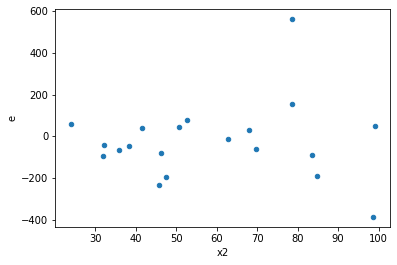

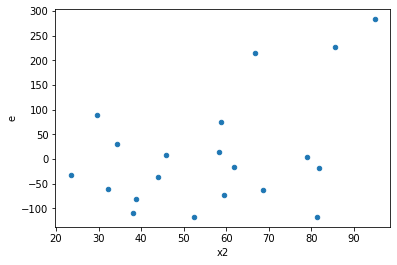

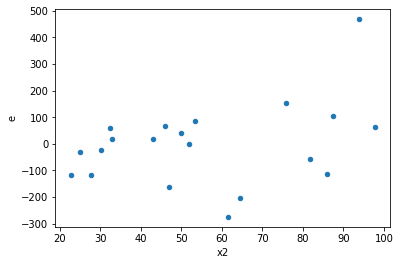

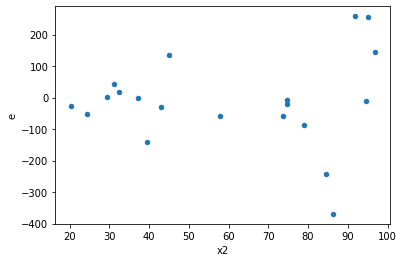

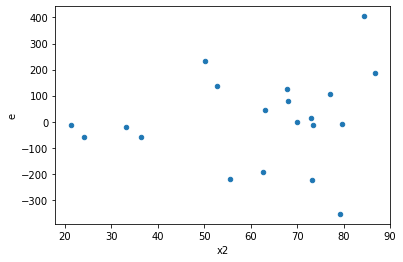

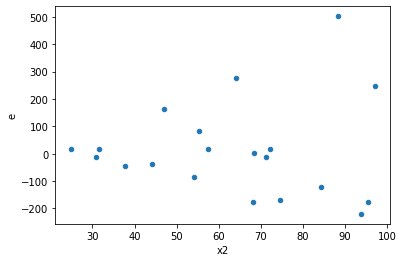

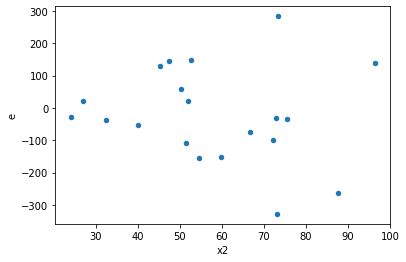

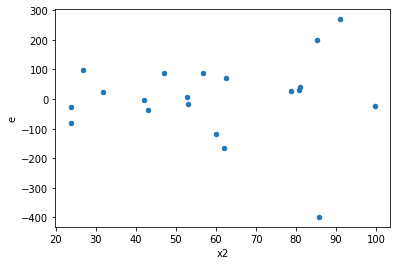

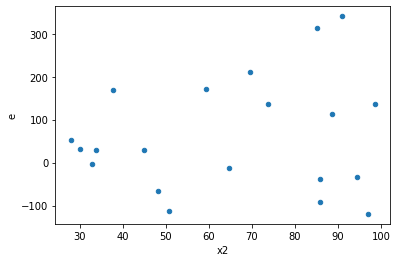

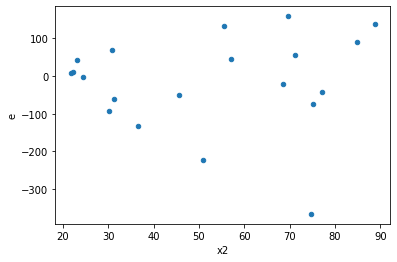

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,8.0,8.0,34267.502673381634,58869.83936759962,4283.437834172704,7358.729920949952,1.7179495082764997,0.46082804273738165,0.7695859786313092,0.23041402136869082,Reject001=1 : Homoscedasticity
2.0,8.0,8.0,34554.634058891665,281199.2976113555,4319.329257361458,35149.912201419436,8.137817264454483,0.007635909611553249,0.9961820451942234,0.0038179548057766244,Reject001=0 : Heteroscedasticity
5.0,4.0,12.0,90362.8764224065,464551.78946674115,22590.719105601624,38712.64912222843,1.7136528032270204,0.42288020844368224,0.7885598957781589,0.21144010422184112,Reject001=1 : Homoscedasticity
6.0,8.0,8.0,150291.8843627564,215015.06020727468,18786.48554534455,26876.882525909336,1.430649839270744,0.6243689132615482,0.6878155433692259,0.3121844566307741,Reject001=1 : Homoscedasticity
9.0,10.0,6.0,98081.4038966095,149225.2218097101,9808.14038966095,24870.870301618354,2.5357375928096904,0.2669329390593367,0.8665335304703317,0.13346646952966834,Reject001=1 : Homoscedasticity
11.0,8.0,8.0,100458.6127070868,188749.0668308814,12557.32658838585,23593.633353860176,1.8788739137900339,0.39102694020241024,0.8044865298987949,0.19551347010120512,Reject001=1 : Homoscedasticity
15.0,8.0,8.0,272635.1126663696,286908.7236324,34079.3890832962,35863.59045405,1.0523542651070676,0.9442345498689528,0.5278827250655236,0.4721172749344764,Reject001=1 : Homoscedasticity
17.0,8.0,8.0,52737.05930125673,389233.41185094166,6592.132412657092,48654.17648136771,7.380643081129595,0.010516797081080664,0.9947416014594597,0.005258398540540332,Reject001=1 : Homoscedasticity
20.0,7.0,9.0,53216.61993925281,218733.55280395874,7602.374277036115,24303.72808932875,3.196860244402999,0.10828175152658326,0.9458591242367084,0.05414087576329163,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,9.0,478463.7140916438,91016.73000399016,68351.95915594911,10112.97000044335,0.1479543545689744,0.019661821096545656,Reject001=1 : Homoscedasticity
1.0,8.0,8.0,34267.502673381634,58869.83936759962,4283.437834172704,7358.729920949952,1.7179495082764997,0.46082804273738165,Reject001=1 : Homoscedasticity
2.0,8.0,8.0,34554.634058891665,281199.2976113555,4319.329257361458,35149.912201419436,8.137817264454483,0.007635909611553249,Reject001=0 : Heteroscedasticity
3.0,8.0,8.0,255072.24728671234,44573.508385248715,31884.030910839043,5571.688548156089,0.17474856186587068,0.023490631835247078,Reject001=1 : Homoscedasticity
4.0,8.0,8.0,307641.43203146616,62151.54723973037,38455.17900393327,7768.943404966296,0.2020259326883298,0.03632952699756374,Reject001=1 : Homoscedasticity
5.0,4.0,12.0,90362.8764224065,464551.78946674115,22590.719105601624,38712.64912222843,1.7136528032270204,0.42288020844368224,Reject001=1 : Homoscedasticity
6.0,8.0,8.0,150291.8843627564,215015.06020727468,18786.48554534455,26876.882525909336,1.430649839270744,0.6243689132615482,Reject001=1 : Homoscedasticity
7.0,8.0,8.0,212828.99998188653,34421.565626820666,26603.624997735817,4302.695703352583,0.16173343684248961,0.018487922716433475,Reject001=1 : Homoscedasticity
8.0,9.0,7.0,248143.90014620405,64848.21601813137,27571.54446068934,9264.030859733053,0.3359997069783821,0.13068051325158853,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      757
Reject001=0 : Heteroscedasticity    243
Name: Result_test, dtype: int64